In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
df = pd.read_csv('Housing.csv')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numerical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Function to predict price for new data
def predict_price(model, area, bedrooms, bathrooms, stories, mainroad, guestroom,
                 basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
    """
    Predict house price based on input features
    """
    # Create a DataFrame with the input values
    new_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    })

    # Make prediction
    prediction = model.predict(new_data)
    return prediction[0]

# Example prediction
example_prediction = predict_price(
    pipeline,
    area=7500,
    bedrooms=4,
    bathrooms=2,
    stories=3,
    mainroad='yes',
    guestroom='no',
    basement='no',
    hotwaterheating='no',
    airconditioning='yes',
    parking=2,
    prefarea='yes',
    furnishingstatus='furnished'
)

print(f"\nExample Prediction:")
print(f"Predicted Price: ₹{example_prediction:,.2f}")

# Compare with actual similar data from the dataset
similar_houses = df[(df['area'] >= 7400) & (df['area'] <= 7600) &
                   (df['bedrooms'] == 4) & (df['bathrooms'] == 2)]
print(f"\nSimilar houses from dataset:")
print(similar_houses[['price', 'area', 'bedrooms', 'bathrooms', 'furnishingstatus']])

# Get feature importance (for linear regression coefficients)
# Extract feature names after one-hot encoding
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_features)

# Get coefficients
coefficients = pipeline.named_steps['regressor'].coef_

print(f"\nTop 10 most important features:")
feature_importance = pd.DataFrame({
    'feature': all_features,
    'coefficient': coefficients
}).sort_values('coefficient', key=abs, ascending=False)

print(feature_importance.head(10))

Dataset shape: (545, 13)

First few rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data types:
price                int64
area             


Covariance Matrix:
                  price          area       bedrooms      bathrooms  \
price      3.498544e+12  2.175676e+09  505946.425931  486409.333378   
area       2.175676e+09  4.709512e+06     243.232140     211.346617   
bedrooms   5.059464e+05  2.432321e+02       0.544738       0.138674   
bathrooms  4.864093e+05  2.113466e+02       0.138674       0.252476   
stories    6.826446e+05  1.581294e+02       0.261589       0.142171   
parking    6.194673e+05  6.599897e+02       0.088562       0.076842   

                 stories        parking  
price      682644.632825  619467.324204  
area          158.129368     659.989696  
bedrooms        0.261589       0.088562  
bathrooms       0.142171       0.076842  
stories         0.752543       0.034043  
parking         0.034043       0.742330  


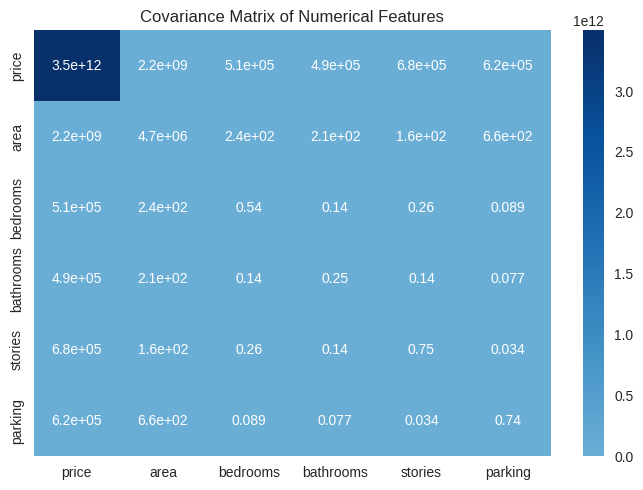

In [ ]:
# Covariance matrix of numerical features
numerical_cols_with_target = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cov_matrix = df[numerical_cols_with_target].cov()

print("\nCovariance Matrix:")
print(cov_matrix)

# Visualize covariance heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cov_matrix, annot=True, cmap='Blues', center=0)
plt.title("Covariance Matrix of Numerical Features")
plt.tight_layout()
plt.show()


In [ ]:
# Create binary target
median_price = df['price'].median()
y_class = (df['price'] > median_price).astype(int)

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic Regression pipeline
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train and predict
log_reg_pipeline.fit(X_train_cls, y_train_cls)
y_pred_cls = log_reg_pipeline.predict(X_test_cls)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))


Logistic Regression Results:
Accuracy: 0.8440366972477065
Confusion Matrix:
 [[46  5]
 [12 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.90      0.79      0.84        58

    accuracy                           0.84       109
   macro avg       0.85      0.85      0.84       109
weighted avg       0.85      0.84      0.84       109



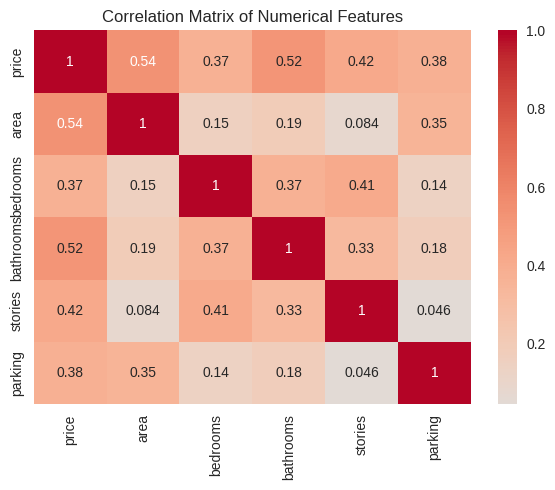

In [ ]:
# 2. Correlation Heatmap (Numerical Features)
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(6, 5))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


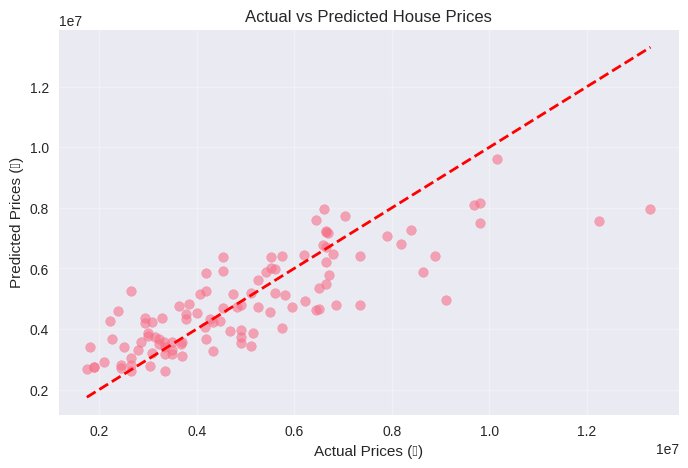

In [ ]:
# 3. Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices (₹)')
plt.ylabel('Predicted Prices (₹)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)